<a href="https://colab.research.google.com/github/Sprivacy/Machine-Learning-with-Differential_Privacy/blob/main/DNN_Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mount Data on your google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Neccessary Libraries for DP-SGD
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 1.x
except Exception:
  pass

import tensorflow as tf

import numpy as np

tf.compat.v1.logging.set_verbosity(tf.logging.ERROR)

TensorFlow 1.x selected.


In [ ]:
#importing libraries
#from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy
#from tensorflow_privacy.privacy.optimizers.dp_optimizer import DPGradientDescentGaussianOptimizer,DPAdamGaussianOptimizer
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
!pip install tensorflow_privacy

In [ ]:
#!pip install tensorflow_privacy

from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy
from tensorflow_privacy.privacy.optimizers.dp_optimizer import DPGradientDescentGaussianOptimizer,DPAdamGaussianOptimizer

In [ ]:
df = pd.read_csv('...../covid.csv', low_memory=False)

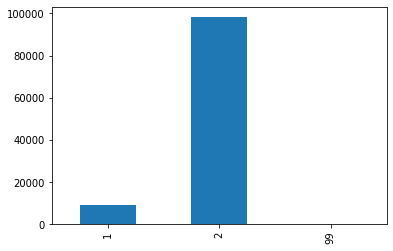

In [ ]:
#visualize the dataset
#dataset.head(10)
#data=dataset
df.isnull().sum()
df.drop(columns={'entry_date','date_died','date_symptoms','id'},axis=1,inplace=True)
df['covid_res'].value_counts().to_frame()

df['covid_res'].replace([1,2,3],[1,0,2],inplace=True)
df['covid_res'].value_counts().to_frame()

df.rename(columns={'covid_res':'Chance'},inplace=True)
#only take positive or negative patient, ignore awaiting patient
df=df[df['Chance']!=2]

df=df[df['intubed']!=97]
df['intubed'].value_counts().sort_index().plot.bar()
df=df[df['intubed']!=99]
df['intubed'].value_counts().to_frame()
df=df[df['pneumonia']!=99]
df=df[df['pregnancy']!=97]
df=df[df['pregnancy']!=98]
df=df[df['diabetes']!=98]
df=df[df['copd']!=98]
df=df[df['asthma']!=98]
df=df[df['inmsupr']!=98]
df=df[df['hypertension']!=98]
df=df[df['other_disease']!=98]
df=df[df['cardiovascular']!=98]
df=df[df['obesity']!=98]
df=df[df['renal_chronic']!=98]
df=df[df['tobacco']!=98]
df=df[df['contact_other_covid']!=99]
df=df[df['icu']!=99]
df=df[df['icu']!=97]
df.reset_index(drop=True,inplace=True)
df.head(10)

features=['sex', 'patient_type', 'intubed', 'pneumonia', 'age', 'pregnancy',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'icu']
list(enumerate(features))

X=df[['sex', 'patient_type', 'intubed', 'pneumonia', 'age', 'pregnancy',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'icu']]
y=df['Chance']

from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler()




In [ ]:
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)

In [ ]:
x_train=X_train.reshape(X_train.shape[0],len(X_train[0]),1)
x_test=X_test.reshape(X_test.shape[0],len(X_test[0]),1)

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
def label(my_list):
  import numpy as np
  my_array=np.array(my_list)
  p=np.zeros(my_array.shape)
  b=my_array.max(-1)
  condition = my_array == b[..., np.newaxis]
  c = np.where(condition, 1, 0)
  final=np.multiply(c, my_array)
  #my_sum=np.sum(final,axis=0)
  labels=np.argmax(final, axis=1)
  return labels

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


In [ ]:
def DP_SGD(noise_multiplier,x_train,y_train,x_test,y_test):
   epochs = 300
   batch_size = 250
   l2_norm_clip = 1.5
   #noise_multiplier = .88
   num_microbatches = 125
   learning_rate = 0.01
   x_train_s=x_train
   y_train_s=y_train
   x_test=x_test
   y_test_s=y_test
   n=len(y_train)
   #noise_multiplier=.5
   if batch_size % num_microbatches != 0:
     raise ValueError('Batch size should be an integer multiple of the number of microbatches')
   
   eps=compute_dp_sgd_privacy.compute_dp_sgd_privacy(n=n, batch_size=250, noise_multiplier=noise_multiplier, epochs=epochs, delta=1e-4)
   print(eps)

   model = tf.keras.Sequential([
   tf.keras.layers.Dense(64,
                           activation='relu',
                           input_shape=(18,1)),
   tf.keras.layers.Dense(64,
                           activation='relu'),
   #tf.keras.layers.MaxPool2D(2, 1),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(2, activation='softmax')
       ])
   print("compplete")
   optimizer = DPAdamGaussianOptimizer(
            l2_norm_clip=l2_norm_clip,
            noise_multiplier=noise_multiplier,
            num_microbatches=num_microbatches,
            learning_rate=learning_rate)
   
   loss = tf.keras.losses.CategoricalCrossentropy(
    from_logits=True, reduction=tf.losses.Reduction.NONE)
   model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
   model.fit(x_train_s, y_train_s,
          epochs=epochs,
          validation_data=(x_test[0:1000], y_test_s[0:1000]),
          batch_size=batch_size)
   return model

In [ ]:
#model=SGD_lg(1,x_train[0:15000],trainY[0:15000],x_test,testY)
def calc_labelAcc(Model,xtest,ytest):
  from sklearn.metrics import accuracy_score
  ypred=Model.predict_classes(xtest)
  acc=accuracy_score(label(ytest), ypred)
  return acc

In [ ]:
###training and testing data
n=5000
xtrain_agg=x_train[0:n]
ytrain_agg=y_train[0:n]
#ytrain_agg=ytrain_agg.to_numpy()
#ytrain_pred=model_np.predict_proba(xtrain_agg)
xtest_agg=x_test[0:n]
ytest_agg=y_test[0:n]
#ytest_agg=ytest_agg.to_numpy()
#ytest_pred=model_np.predict_proba(xtest_agg)
target_train_agg = (xtrain_agg,ytrain_agg)
target_test_agg = (xtest_agg,ytest_agg)
#target_train_data_agg, target_test_data_agg = sample_data(target_train_agg, target_test_agg, NUM_TARGET)


In [ ]:
noise_mul=[790,114,13.6,2.015,.64,.344,.2213]

In [ ]:
!pip install -U -q PyDrive
ep1=np.zeros(len(noise_mul))  #calculate epsilon
acc_sgd= np.zeros(len(noise_mul))
model_index =0
for i in range(7):
  model=DP_SGD(noise_mul[i],xtrain_agg,ytrain_agg,xtest_agg,ytest_agg)
  acc_sgd[i]=calc_labelAcc(model,xtest_agg,ytest_agg)
   globals()['model_sgd%s' % i]=model



In [ ]:
utility_sgd=np_sgd-acc_sgd
utility_sgd

array([0.116 , 0.0972, 0.0698, 0.0386, 0.031 , 0.034 , 0.0352])

In [ ]:
#For non-private Settings
from keras.regularizers import l2
opt = tf.keras.optimizers.Adam(learning_rate=.01)
model_np = tf.keras.Sequential([
   #tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(64,
                           activation='relu',
                           input_shape=(18,1)),
   #tf.keras.layers.MaxPool2D(2, 1),
   tf.keras.layers.Dense(64,
                           activation='relu'),
   #tf.keras.layers.MaxPool2D(2, 1),
   tf.keras.layers.Flatten(),
   #tf.keras.layers.Dense(50,activation='relu'),
   #tf.keras.layers.Dense(25, activation='relu'),
   tf.keras.layers.Dense(2, activation='softmax')
       ])
loss = tf.keras.losses.CategoricalCrossentropy(
    from_logits=True, reduction=tf.losses.Reduction.NONE)
model_np.compile(optimizer=opt, loss=loss, metrics=['accuracy'])
model_np.fit(xtrain_agg, ytrain_agg,
          epochs=300,
          validation_data=(x_test[0:500], y_test[0:500]),
          batch_size=250)


In [ ]:
np_sgd=calc_labelAcc(model_np,xtest_agg,ytest_agg)
np_sgd

PATE

In [ ]:
def build_cnn_model():
    import keras
    from keras.models import Sequential
    from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
    num_class=2
    # build the model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(len(x_train[0]),1)))
    model.add(Dense(64, activation='relu'))
    model.add(Flatten())
    #model.add(Dense(50, activation='relu'))
    #model.add(Dense(64, activation='tanh'))
    if num_class==1:
        model.add(Dense(num_class, activation='sigmoid'))    
    else:
        model.add(Dense(num_class, activation='softmax')) 
    model.summary()
    return model

In [ ]:
#split datasets into multiple teacher
#Divide the images into 5 
# split x_train to 10 disjoint datasets
#store each dataset variable name is the list Xtrain
import numpy as np
M=30
j=0
k=len(xtrain_agg)/M
#print(x_train)

for x in range(0,M):
             globals()['x_train_split%s' % x]=xtrain_agg[int(j):int(k+j)]
             globals()['y_train_split%s' % x]=ytrain_agg[int(j):int(k+j)]
             j=k+j
             #print(j)
             
print(x_train_split29.shape)

(167, 18, 1)


In [ ]:
for iter in range(M):
  model=build_cnn_model()
  model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
  model.fit(globals()['x_train_split%s' % iter], globals()['y_train_split%s' % iter], batch_size=250, epochs=300, verbose=1, shuffle=True)
  globals()['model_pate%s' % iter]=model

In [ ]:
#compute label
def label(my_list):
  import numpy as np
  my_array=np.array(my_list)
  p=np.zeros(my_array.shape)
  b=my_array.max(-1)
  condition = my_array == b[..., np.newaxis]
  c = np.where(condition, 1, 0)
  final=np.multiply(c, my_array)
  #my_sum=np.sum(final,axis=0)
  labels=np.argmax(final, axis=1)
  return labels

In [ ]:
#function for vote counting
def vote(my_list):
  import numpy as np
  my_array=np.array(my_list)
  p=np.zeros(my_array.shape)
  b=my_array.max(-1)
  condition = my_array == b[..., np.newaxis]
  c = np.where(condition, 1, 0)
  final=np.multiply(c, my_array)
  #my_sum=np.sum(final,axis=0)
  labels=np.argmax(final, axis=1)
  return c

In [ ]:
sum=np.zeros([len(y_test),2])
for i in range(M):
  New_model=globals()['model_pate%s' % i]
  y=np.zeros(y_test.shape)
  y=New_model.predict_proba(x_test)
  y=vote(y)
  sum=y+sum


In [ ]:
#create the labels
from sklearn.metrics import accuracy_score
lab=label(sum)
#clear accuracy
y_true=label(y_test)
np_pate=accuracy_score(y_true,lab)

In [ ]:
ep=[.01,.1,1,10,100,1000,10000]
client_acc=np.zeros(len(ep))

In [ ]:
#add noise 
def add_noise_sum(noise,sum,experiment,ypred):
  sum_s=sum
  predt=np.zeros(experiment)
  for i1 in range(experiment):
    sum_s=np.zeros(sum.shape)
    sum_f=sum+np.random.laplace(loc=0.0, scale=1/noise)
    sum2=label(sum_f)
    predt[i1]=accuracy_score(ypred,sum2)
    #print(i)
  pred=np.average(predt)
  #print(predt)
  #print(pred)
  return pred

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
#Noise after Aggregation Method
for i in range(0,len(ep)):
                          sum_s=np.zeros(sum.shape)
                          sum_n=sum
                          #sum_s=sum_n+np.random.laplace(loc=0.0, scale=1/noise[i])
                          predF=add_noise_sum(ep[i],sum_n,100,y_true)
                          client_acc[i]=predF
print(client_acc)
print(ep)

In [ ]:
utility_pate=np_pate-client_acc
utility_pate

array([0.13756093, 0.01519654, 0.        , 0.        , 0.        ,
       0.        , 0.        ])

Graph

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

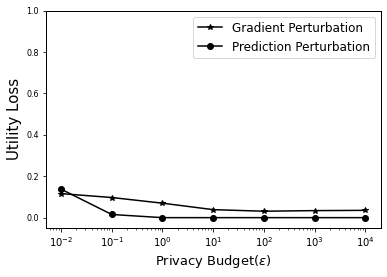

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #grafikleştirme için
import matplotlib.pyplot as plt 
from google.colab import files
test1 = plt.figure()
#plt.semilogx(ep,non_p-acc_obj,color="black",marker='3',label='Objective Perturbation',linewidth=1.5)
plt.semilogx(ep,utility_sgd,color="black",marker='*',label='Gradient Perturbation',linewidth=1.5)
#plt.semilogx(ep,np_out-acc_out,color="black",marker='+',linestyle="--",label='Output Perturbation',linewidth=1.5)
plt.semilogx(ep,utility_pate,color="black",marker='o',label='Prediction Perturbation',linewidth=1.5)
#plt.semilogx(ep,non_p-acc_in,color="orange",marker='.',linestyle="--",label='Input',linewidth=1.5)
#plt.plot(ep,non_p,color="red",marker='*',linestyle="--",label='Non-Private Model',linewidth=2)
plt.legend(loc=1,fontsize=12)
plt.xlabel("Privacy Budget($\epsilon$)",fontsize=13)
plt.ylabel("Utility Loss",fontsize=15)
#plt.xscale('symlog', linthreshy=0.1)
#plt.ylim([-.1,1])
plt.xticks(size = 10)
plt.yticks(size = 8)
plt.ylim([-.05,1])
#y.set_color("black")
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['axes.facecolor'] = 'white'
#test1.set_facecolor('white')
test1.show()
test1.savefig('DNN_perturb_acc_Covid.pdf')
files.download('DNN_perturb_acc_Covid.pdf')

Attack The dataset

In [ ]:
#Assign necessary variables for attacking the model
import argparse
import csv
import numpy as np
from sklearn.utils import resample, shuffle

import keras
import numpy as np
from sklearn.utils import resample

LEARNING_RATE = 0.01
EPOCH = 300
#EPOCH = 30
DATA_SIZE = 10000
TRAINING_SIZE = 5000
TEST_SIZE = 5000
NUM_TARGET = 1
#NUM_SHADOW = 100
NUM_SHADOW = 10
IN = 1
OUT = 0
VERBOSE = 1

In [ ]:
#call required libraries
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.utils import to_categorical 
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD

In [ ]:
#Define model configuaration
# Model configuration
batch_size = 250
#img_width, img_height, img_num_channels = 32, 32, 3
#loss_function = sparse_categorical_crossentropy
no_classes = 2
no_epochs = 250
optimizer = Adam()
validation_split = 0.2
verbosity = 0

In [ ]:
def build_cnn_model():
    import keras
    from keras.models import Sequential
    from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
    num_class=2
    # build the model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(len(x_train[0]),1)))
    model.add(Dense(64, activation='relu'))
    model.add(Flatten())
    #model.add(Dense(50, activation='relu'))
    #model.add(Dense(64, activation='tanh'))
    if num_class==1:
        model.add(Dense(num_class, activation='sigmoid'))    
    else:
        model.add(Dense(num_class, activation='softmax')) 
    model.summary()
    return model

In [ ]:
#data sampling
def sample_data(train_data,test_data,num_sets):
    (x_train, y_train), (x_test, y_test) = train_data, test_data
    new_x_train, new_y_train = [], []
    new_x_test, new_y_test = [], []
    for i in range(num_sets):
        x_temp, y_temp = resample(x_train, y_train, n_samples=n, random_state=0)
        new_x_train.append(x_temp)
        new_y_train.append(y_temp)
        x_temp, y_temp = resample(x_test, y_test, n_samples=n, random_state=0)
        new_x_test.append(x_temp)
        new_y_test.append(y_temp)
    return (new_x_train, new_y_train), (new_x_test, new_y_test)

In [ ]:
def get_trained_keras_models(keras_model, train_data, test_data, num_models):
    (x_train, y_train), (x_test, y_test) = train_data, test_data
    models = []
    for i in range(num_models):
        models.append(keras.models.clone_model(keras_model))
        models[i].compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])
        models[i].fit(x_train[i], y_train[i], batch_size=32, epochs=EPOCH, verbose=VERBOSE, shuffle=True)
        score = models[i].evaluate(x_test[i], y_test[i], verbose=VERBOSE)
        print('\n', 'Model ', i, ' test accuracy:', score[1])
    return models

In [ ]:
def get_trained_keras_models_target(keras_model, train_data, test_data, num_models):
    (x_train, y_train), (x_test, y_test) = train_data, test_data
    models = []
    for i in range(num_models):
        models.append(keras.models.clone_model(keras_model))
        models[i].compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])
        models[i].fit(x_train[i], y_train[i], batch_size=32, epochs=EPOCH, verbose=VERBOSE, shuffle=True)
        score = models[i].evaluate(x_test[i], y_test[i], verbose=VERBOSE)
        print('\n', 'Model ', i, ' test accuracy:', score[1])
    return models

In [ ]:
#collect the attack dataset from shadow models
def get_attack_dataset(models, train_data, test_data, num_models, data_size):
    # generate dataset for the attack model
    (x_train, y_train), (x_test, y_test) = train_data, test_data
    num_classes = len(y_train[0][0])
    x_data, y_data = [[] for i in range(num_classes)], [[] for i in range(num_classes)]
    for i in range(num_models):
        # IN data
        x_temp, y_temp = resample(x_train[i], y_train[i], n_samples=data_size, random_state=0)
        for j in range(data_size):
            y_idx = np.argmax(y_temp[j])
            x_data[y_idx].append(models[i].predict(x_temp[j:j+1])[0])
            #print(y_idx)
            y_data[y_idx].append(IN)
            print("starts1",j)
        # OUT data
        x_temp, y_temp = resample(x_test[i], y_test[i], n_samples=data_size, random_state=0)
        for j in range(data_size):
            y_idx = np.argmax(y_temp[j])
            p=models[i].predict(x_temp[j:j+1])[0]
            x_data[y_idx].append(p)
            y_data[y_idx].append(OUT)
            print("starts2",j)
    return x_data, y_data

In [ ]:
#Get the prediction vectors from the DP model
def get_attack_dataset_combined(x_train, x_test, train_pred, y_train, y_test, test_pred):
    # generate dataset for the attack model
    #(x_train, y_train), (x_test, y_test) = train_data, test_data
    data_size=len(y_train)
    num_class = 2
    x_data, y_data = [[] for _ in range(num_class)], [[] for _ in range(num_class)]
    #for i in range(num_models):
        # IN data
    #x_temp, y_temp = resample(x_train, y_train, n_samples=data_size, random_state=0)
    for j in range(data_size):
            y_idx = np.argmax(y_train[j])
            x_data[y_idx].append(train_pred[j])
            #print(train_pred[j])
            #x_data[y_idx].append(models.predict(x_temp[j:j+1])[0])
            y_data[y_idx].append(IN)
        # OUT data
    #x_temp, y_temp = resample(x_test, y_test, n_samples=data_size, random_state=0)
    for j in range(data_size):
            y_idx = np.argmax(y_train[j])
            #x_data[y_idx].append(models.predict(x_temp[j:j+1])[0])
            x_data[y_idx].append(test_pred[j])
            y_data[y_idx].append(OUT)
    return x_data, y_data

In [ ]:
#generate the report
def get_leakage(models, test_data):
    from sklearn.metrics import accuracy_score, precision_score, recall_score
    from sklearn.metrics import average_precision_score
    from sklearn import metrics
    from sklearn.metrics import confusion_matrix
    (x_test, y_true) = test_data
    acc_scores = []
    pre_scores = []
    rec_scores = []
    fp=np.zeros(len(models))
    tp=np.zeros(len(models))
    tn=np.zeros(len(models))
    fn=np.zeros(len(models))
    for i in range(len(models)):
        y_pred = models[i].predict(x_test[i])
        # _LOG_PRINT(y_pred)
        acc_scores.append(accuracy_score(y_true[i], y_pred))
        pre_scores.append(average_precision_score(y_true[i], y_pred))
        rec_scores.append(recall_score(y_true[i], y_pred))
        tn[i], fp[i], fn[i], tp[i] = confusion_matrix(y_true[i], y_pred).ravel()
    return np.sum(tn),np.sum(tp),np.sum(fn),np.sum(fp)

In [ ]:
#attack classifier:SVM
def get_trained_svm_models(train_data, test_data, num_models):
    from sklearn import svm
    (x_train, y_train), (x_test, y_test) = train_data, test_data
    models = []
    for i in range(num_models):
        print('Training svm model : ', i)
        models.append(svm.SVC(gamma='scale',kernel='linear',verbose=VERBOSE))
        models[i].fit(x_train[i], y_train[i])
        score = models[i].score(x_test[i],y_test[i])
        #print(i)
        print('SVM model ', i, 'score : ',score)
    return models,score

In [ ]:
shadow_train = (x_train[n:n*2],y_train[n:n*2])
shadow_test = (x_test[n:n*2],y_test[n:n*2])
shadow_train_data, shadow_test_data = sample_data(shadow_train, shadow_test, NUM_SHADOW)

In [ ]:
#when we use logistic regression model from sklearn
cnn_model=build_cnn_model()
shadow_models = get_trained_keras_models(cnn_model,shadow_train_data, shadow_test_data, NUM_SHADOW)
attack_train = get_attack_dataset(shadow_models, shadow_train_data, shadow_test_data, NUM_SHADOW, TEST_SIZE)

In [ ]:
def lk(tn,tp,fn,fp):
  tpr=(tp/(tp+fn))
  fpr=(fp/(fp+tn))
  #print(fpr)
  return tpr-fpr

In [ ]:
##attack classifier:RF
def get_trained_RF_models(train_data, test_data, num_models):
    from sklearn.ensemble import RandomForestClassifier
    (x_train, y_train), (x_test, y_test) = train_data, test_data
    models = []
    score=np.zeros(num_models)
    #RF=RandomForestClassifier(random_state=0)
    for i in range(num_models):
        print('Training RF model : ', i)
        models.append(RandomForestClassifier(random_state=0))
        models[i].fit(x_train[i], y_train[i])
        score[i] = models[i].score(x_test[i],y_test[i])
        print('Random Forest model ', i, 'score : ',score)
    return models, score

In [ ]:
n=5000
xtrain=x_train[0:n]
ytrain=y_train[0:n]
#ytrain_agg=ytrain_agg.to_numpy()
#ytrain_pred=model_np.predict_proba(xtrain_agg)
xtest=x_test[0:n]
ytest=y_test[0:n]
#ytest_agg=ytest_agg.to_numpy()
#ytest_pred=model_np.predict_proba(xtest_agg)
target_train_agg = (xtrain,ytrain)
target_test_agg = (xtest,ytest)
target_train_data, target_test_data = sample_data(target_train_agg, target_test_agg, 1)

In [ ]:
#non_private
target_model = get_trained_keras_models(cnn_model,target_train_data, target_test_data, 1)
attack_test_agg=get_attack_dataset(target_model, target_train_data, target_test_data, 1, TEST_SIZE)

In [ ]:
def get_trained_svm_models(train_data, test_data, num_models):
    from sklearn import svm
    (x_train, y_train), (x_test, y_test) = train_data, test_data
    models = []
    k=0
    for i in range(num_models):
        print('Training svm model : ', i)
        models.append(svm.SVC(gamma='scale',kernel='linear',verbose=VERBOSE))
        models[i].fit(x_train[i], y_train[i])
        score = models[i].score(x_test[i],y_test[i])
        print('SVM model ', i, 'score : ',score)
        k=k+1
        print('this is executable',k)
    return models,score

In [ ]:
#non_private
attack_model,scores = get_trained_RF_models(attack_train,attack_test_agg, 2)
#scores=get_score_svm_models(attack_model,attack_train)
print(scores)
tn,tp,fn,fp=get_leakage(attack_model, attack_test_agg)
l1=lk(tn,tp,fn,fp)

Training RF model :  0
Random Forest model  0 score :  [0.48741754 0.        ]
Training RF model :  1
Random Forest model  1 score :  [0.48741754 0.5117657 ]
[0.48741754 0.5117657 ]


Privacy Leakage:gradient Perturbation

In [ ]:
p=len(ep)
lgd=np.zeros(p)
tn2=np.zeros(p)
tp2=np.zeros(p)
fn2=np.zeros(p)
fp2=np.zeros(p)
for i in range(len(ep)):
     target_model=[]
     modelSGD=globals()['model_sgd%s' % i]
     target_model.append(modelSGD)
     attack_test_agg=get_attack_dataset(target_model, target_train_data, target_test_data, 1, TEST_SIZE)
     tn2[i],tp2[i],fn2[i],fp2[i]=get_leakage(attack_model, attack_test_agg)
     lgd[i]=max(0,lk(tn2[i],tp2[i],fn2[i],fp2[i]))

In [ ]:
print((lgd))
print(tp2)


PATE

In [ ]:
def PATE(ep,xtest1,ytest1):
            sum_t=np.zeros([len(ytest1),2])
            for k1 in range(10):
               sum=PATE_sum(xtest1,ytest1)
               sum_s=np.zeros(sum.shape)
               sum_n=sum
               sum_s=sum_n+np.random.laplace(loc=0.0, scale=1/ep)
               sum_t=sum_s+sum_t

            return sum_t/10
          


In [ ]:
def PATE_sum(xtest1,ytest1):
  sum=np.zeros([len(ytest1),2])
  for iter in range(M):
    New_model=globals()['model_pate%s' % iter]
    y=np.zeros([len(ytest1),2])
    y=New_model.predict_proba(xtest1)
  #print(y.shape)
    y=vote(y)
    sum=y+sum
  return sum

In [ ]:
p=len(ep)
lpate=np.zeros(p)
tn4=np.zeros(p)
tp4=np.zeros(p)
fn4=np.zeros(p)
fp4=np.zeros(p)
for i in range(len(ep)):
     ytrain_pred=PATE(ep[i],xtrain,ytrain)
     ytest_pred=PATE(ep[i],xtest,ytest)
     attack_test_agg=get_attack_dataset_combined(xtrain,xtest,ytrain_pred,ytrain,ytest,ytest_pred)
     print("complete")
     tn4[i],tp4[i],fn4[i],fp4[i]=get_leakage(attack_model, attack_test_agg)
     lpate[i]=max(0,lk(tn2[i],tp2[i],fn2[i],fp2[i]))

In [ ]:
print((lpate))
print(tp4)

Produce Graph

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

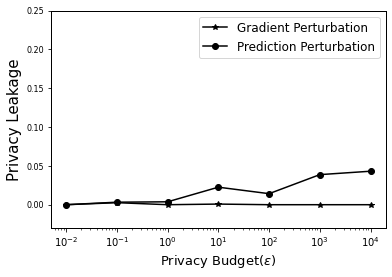

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #grafikleştirme için
import matplotlib.pyplot as plt 
from google.colab import files
test1 = plt.figure()
#plt.semilogx(ep,lobj,color="black",marker='3',label='Objective Perturbation',linewidth=1.5)
plt.semilogx(ep,lgd,color="black",marker='*',label='Gradient Perturbation',linewidth=1.5)
#plt.semilogx(ep,lout,color="black",marker='+',linestyle="--",label='Output Perturbation',linewidth=1.5)
plt.semilogx(ep,lpate,color="black",marker='o',label='Prediction Perturbation',linewidth=1.5)
#plt.semilogx(ep,non_p-acc_in,color="orange",marker='.',linestyle="--",label='Input',linewidth=1.5)
#plt.plot(ep,non_p,color="red",marker='*',linestyle="--",label='Non-Private Model',linewidth=2)
plt.legend(loc=1,fontsize=12)
plt.xlabel("Privacy Budget($\epsilon$)",fontsize=13)
plt.ylabel("Privacy Leakage",fontsize=15)
#plt.xscale('symlog', linthreshy=0.1)
#plt.ylim([-.1,1])
plt.xticks(size = 10)
plt.yticks(size = 8)
plt.ylim([-.03,.25])
#y.set_color("black")
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['axes.facecolor'] = 'white'
#test1.set_facecolor('white')
test1.show()
test1.savefig('DNN_perturb_leakage_medical.pdf')
files.download('DNN_perturb_leakage_medical.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

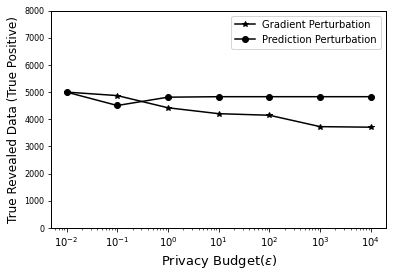

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #grafikleştirme için
import matplotlib.pyplot as plt 
from google.colab import files
test1 = plt.figure()
#plt.semilogx(ep,tp1,color="black",marker='3',label='Objective Perturbation',linewidth=1.5)
plt.semilogx(ep,tp2,color="black",marker='*',label='Gradient Perturbation',linewidth=1.5)
#plt.semilogx(ep,tp3,color="black",marker='+',linestyle="--",label='Output Perturbation',linewidth=1.5)
plt.semilogx(ep,tp4,color="black",marker='o',label='Prediction Perturbation',linewidth=1.5)
#plt.semilogx(ep,non_p-acc_in,color="orange",marker='.',linestyle="--",label='Input',linewidth=1.5)
#plt.plot(ep,non_p,color="red",marker='*',linestyle="--",label='Non-Private Model',linewidth=2)
plt.legend(loc=1,fontsize=10)
plt.xlabel("Privacy Budget($\epsilon$)",fontsize=13)
plt.ylabel("True Revealed Data (True Positive)",fontsize=12)
#plt.xscale('symlog', linthreshy=0.1)
#plt.ylim([-.1,1])
plt.xticks(size = 10)
plt.yticks(size = 8)
plt.ylim([0,8000])
#y.set_color("black")
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['axes.facecolor'] = 'white'
#test1.set_facecolor('white')
test1.show()
test1.savefig('DNN_perturb_tp_medical.pdf')
files.download('DNN_perturb_tp_medical.pdf')